# Illustrative example (logistic regression ): 


Use **Boston_house price** dataset, 
1.   Consider **CHAS** as the output variable 
2.   the remaining variables are inputs 
apply logistic regression to do the following tasks:

*  parameter estimation 

*   attribute selection 

*   prediction 

 

In [ ]:
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm

In [ ]:
from pandas import read_csv
boston_df=read_csv('boston_house_prices.csv')
boston_df.head()
X=boston_df.drop('CHAS',axis=1) # input 
y=boston_df['CHAS']   # output
X=sm.add_constant(X) # add intercept
X.head()
y.unique()
X.shape

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(506, 14)

In [ ]:
#modelling 

model_logistic= sm.GLM(y,X, family=sm.families.Binomial()) # logistic regression
res = model_logistic.fit()
res.summary()
res.params
res.pvalues

const      0.468430
CRIM       0.073171
ZN         0.897521
INDUS      0.023906
NOX        0.319097
RM         0.733817
AGE        0.506008
DIS        0.918476
RAD        0.005129
TAX        0.023495
PTRATIO    0.255767
B          0.524645
LSTAT      0.623604
MEDV       0.032476
dtype: float64

# use the above predictive model to predict the CHAS in the last row of the dataset



In [ ]:
subset_X=X[['INDUS','RAD','TAX','MEDV']]
input=subset_X.tail(1)
coef=[0.0952,0.2191,-0.0087,0.0693]
from numpy import inner
from math import exp
 
t=inner(input,coef)
p=1/(1+exp(-t))
p


0.4512567984467605

In [ ]:
boston_df.tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [ ]:
input=X.tail(1)
res.predict(input)


505    0.018329
dtype: float64

In [ ]:
#model evaluation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
 
model_logistic= sm.GLM(y_train,X_train, family=sm.families.Binomial()) # logistic regression
res = model_logistic.fit()
pred=res.predict(X_test)
pred


224    0.291797
137    0.057849
453    0.074672
303    0.085236
254    0.006147
         ...   
434    0.004107
294    0.071799
306    0.114948
463    0.139679
332    0.008881
Length: 102, dtype: float64

In [ ]:
pred_bin = [] 
for x in pred:
  if x > 0.5:
    pred_bin.append(1)
  else:
      pred_bin.append(0) 
 
pred_bin

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
 
from pandas import DataFrame
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_bin,y_test)

array([[92,  8],
       [ 2,  0]])

# Logistic regression using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

#And then prediction: 
pred=model.predict(X_test)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Illustrative example (Naive Bayes): 


Use **Boston_house price** dataset, 
1.   Consider **CHAS** as the output variable 
2.   the remaining variables are inputs 
apply logistic regression to do the following tasks:



*  model evaluation andd validation using accuracy score

* deployment for the last row in the original dataset.

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
from pandas import read_csv
boston_df=read_csv('boston_house_prices.csv')
boston_df.head()
X=boston_df.drop('CHAS',axis=1) # input 
y=boston_df['CHAS']   # output

gnb=GaussianNB()
c=cross_val_score(gnb,X,y,scoring='accuracy', cv=10)
mean(c)

0.7833333333333333

In [ ]:
y.value_counts( )

0    471
1     35
Name: CHAS, dtype: int64

# what is the best value of k?


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
score=[]
for i in range(2,50):
  c=cross_val_score(gnb,X,y,scoring='recall', cv=i)
  score.append(mean(c))


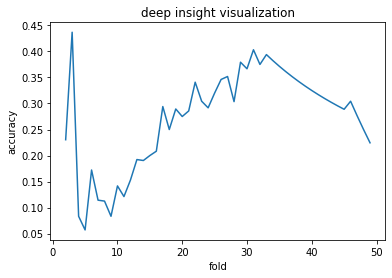

In [ ]:
from matplotlib.pyplot import title, show 
from seaborn import lineplot
from numpy import transpose
k=range(2,50)
from pandas import DataFrame
data = DataFrame([k,score])
data=transpose(data)

data.columns=['fold', 'accuracy']
data.head()

lineplot(x="fold", y="accuracy", data=data)
 
# setting the title using Matplotlib
title('deep insight visualization')
 
show()
 

Note: there is a significant difference btw accuracy and recall. this is because the dataset is not balanced. In order to make the data balanced, we can apply at least two techniques

1.  oversampling 
2. undersampling 


In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn

In [ ]:
 
# define oversampling strategy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import recall_score
oversample = RandomOverSampler(sampling_strategy='minority')

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
#print(Counter(y_train))
#print(Counter(y_over))
gnb.fit(X_over,y_over)
pred=gnb.predict(X_test)
re_b=recall_score(y_test,pred)

#original trainset
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
re=recall_score(y_test,pred)
[re_b,re]

[0.7777777777777778, 0.2222222222222222]

# how to deal with the imbalanced data using cross-validation technique ?  (5marks)



#Apply MC sampling to validate the results of GNB and Logistic regression after data balancing in terms of recall for 20 runs. 

for loop
1. define the models 
2. split the dataset 80/20
3. apply oversampling on the trainset
4. make a prediction based on both models 
5. compute recall for both models
6. take the average of the recall for each model 

# model evaluation and validation 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() ; gnb=GaussianNB()
re_lr=[]
re_gnb=[]
for i in range(100):
  X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
  X_over, y_over = oversample.fit_resample(X_train, y_train)
  gnb.fit(X_over,y_over)
  pred_gnb=gnb.predict(X_test)
  re_b=recall_score(y_test,pred_gnb)
  re_gnb.append(re_b)
  #redo it for LR
  lr.fit(X_over,y_over)
  pred_lr=lr.predict(X_test)
  re=recall_score(y_test,pred_lr)
  re_lr.append(re)


from numpy import mean
result=[mean(re_lr), mean(re_gnb)]
result

[0.7449090909090907, 0.7888874458874459]

In [ ]:
result

[0.7342099567099566, 0.8792027417027418]

# deploy the best model for the last row in the dataset. 

In [ ]:

X_over, y_over = oversample.fit_resample(X, y)
model=gnb.fit(X_over, y_over)


 
pred=model.predict(input)



In [ ]:
from pandas import DataFrame
import numpy as np
from pandas import DataFrame
x1=input('CRIM:')   
x2=input('ZN:')
x3=input('INDUS:')
x4=input('TAX:')
x5=input('NOX:')
x6=input('RM:')
x7=input('AGE:')
x8=input('DIS:')
x9=input('RAD:')
x10=input('PTRATIO:')
x11=input('B:')
x12=input('LSTAT:')
x13=input('MEDV:')
x=np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13])
y=gnb.predict(x.reshape(1,-1))
print('CHAS:',y)

TypeError: ignored